In [17]:
base_file = "figures/10.jpeg"
rotate_file = "figures/rotate_15.jpg"

img = cv2.imread(base_file)
img_rotate = cv2.imread(rotate_file)

img_base = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_rotate_orig = cv2.cvtColor(img_rotate, cv2.COLOR_BGR2GRAY)
img_rotate = cv2.GaussianBlur(img_rotate_orig, (3,3), 0)

w, h = img_base.shape[:2]
scale_ratio = 5
img_base = cv2.resize(img_base, (int(h/scale_ratio), int(w/scale_ratio)))
img_rotate = cv2.resize(img_rotate, (int(h/scale_ratio), int(w/scale_ratio)))
w, h = img_base.shape[:2]
print(w, h)

cv2.imwrite("figures/small_10.jpg", img_base)

806 604


True

In [18]:
import time
import numpy as np
import cv2
import torch

from utils.datasets import letterbox
from utils.models import *
from Utils_orientation import *

# Image path
base_file = "figures/small_0.jpg"
rotate_file = "figures/small_10.jpg"

# Configuration file path
cfg = 'cfg/yolov3.cfg'
data_cfg = 'cfg/coco.data'
weights = 'cfg/yolov3.pt'

# Model parameter
img_size=416
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Initialize model and load weights
model = Darknet(cfg, img_size)
model.load_state_dict(torch.load(weights, map_location=device)['model'])
model.to(device).eval()

# Detection Process Transform tensor into numpy array
if device == torch.device("cpu"):
    detection_base = object_detection(model, base_file).numpy()
    detection_rotate = object_detection(model, rotate_file).numpy()
else:
    detection_base = object_detection(model, base_file).cpu().numpy()
    detection_rotate = object_detection(model, rotate_file).cpu().numpy()
    
# Image Orientation Calculation
show_results = False
show_images = False
mode = "SIFT"
# The index of object using to calculation the capture image
detection_index = 2

TypeError: 'NoneType' object is not subscriptable

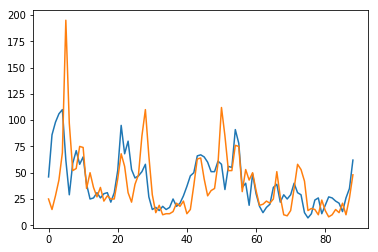

SIFTreal Result: median( 9.694), mean( 9.694) in 0.417


In [19]:
img_base, img_rotate = object_capture(base_file, rotate_file)
histogram_gradient(img_base, img_rotate, mag_thres= 20, bin_num= 90)
#cv2.imwrite('cap.jpg', img_base)
#cv2.imwrite('rotate.jpg', img_rotate)
median, mean, time = angle_cal(img_base, img_rotate, mode, show_results= show_results, show_images= show_images)
print(mode + "real Result: median({0:6.3f}), mean({1:6.3f}) in {2:.3f}".format(median, mean, time))

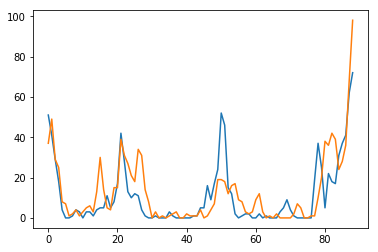

SIFTreal Result: median(14.030), mean(30.171) in 0.073


In [10]:
for detection_index in range(1):
    img_base, img_rotate = object_capture(base_file, rotate_file,
                       bool_cap = True, detection_index = detection_index,
                       detection_base = detection_base, detection_rotate = detection_rotate)
    histogram_gradient(img_base, img_rotate, mag_thres= 20, bin_num= 90)
    median, mean, time = angle_cal(img_base, img_rotate, mode, show_results= show_results, show_images= show_images)
    print(mode + "real Result: median({0:6.3f}), mean({1:6.3f}) in {2:.3f}".format(median, mean, time))